# Final Project

You have made it to the end of the course.
In the labs, you saw a couple simplified examples of constructing data stories.

For the final project, you will 
 1. find some data, 
 2. upload it to JupyterHub
 3. construct a data story

---

## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name of the file that is now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the a data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, and perform some exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [1]:
library(dplyr)
library(tidyr)

file <- read.csv('SkillCraft1_Dataset.csv', encoding = 'utf-8')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
head(file)

GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
52,5,27,10,3000,143.7180,0.0035151591,0.0002196974,7,1.098487e-04,0.0003923169,0.004849036,32.6677,40.8673,4.7508,28,0.00139660,6,0,0.0000e+00
55,5,23,10,5000,129.2322,0.0033038124,0.0002594617,4,2.940566e-04,0.0004324362,0.004307064,32.9194,42.3454,4.8434,22,0.00119350,5,0,2.0757e-04
56,4,30,10,200,69.9612,0.0011010906,0.0003355705,4,2.936242e-04,0.0004614094,0.002925755,44.6475,75.3548,4.0430,22,0.00074455,6,0,1.8876e-04
57,3,19,20,400,107.6016,0.0010335422,0.0002131015,1,5.327537e-05,0.0005434088,0.003782551,29.2203,53.7352,4.9155,19,0.00042620,7,0,3.8358e-04
58,3,32,10,500,122.8908,0.0011360136,0.0003273259,2,0.000000e+00,0.0013285582,0.002368299,22.6885,62.0813,9.3740,15,0.00117450,4,0,1.9254e-05
60,2,27,6,70,44.4570,0.0009783903,0.0002552323,2,0.000000e+00,0.0000000000,0.002424707,76.4405,98.7719,3.0965,16,0.00037221,6,0,0.0000e+00


In [3]:
str(file)

'data.frame':	3395 obs. of  20 variables:
 $ GameID              : int  52 55 56 57 58 60 61 72 77 81 ...
 $ LeagueIndex         : int  5 5 4 3 3 2 1 7 4 4 ...
 $ Age                 : Factor w/ 29 levels "?","16","17",..: 13 9 16 5 18 13 7 3 6 4 ...
 $ HoursPerWeek        : Factor w/ 33 levels "?","0","10","112",..: 3 3 3 12 3 24 28 20 6 13 ...
 $ TotalHours          : Factor w/ 238 levels "?","10","100",..: 123 164 76 146 163 198 97 5 112 215 ...
 $ APM                 : num  144 129 70 108 123 ...
 $ SelectByHotkeys     : num  0.00352 0.0033 0.0011 0.00103 0.00114 ...
 $ AssignToHotkeys     : num  0.00022 0.000259 0.000336 0.000213 0.000327 ...
 $ UniqueHotkeys       : int  7 4 4 1 2 2 6 6 2 8 ...
 $ MinimapAttacks      : num  1.10e-04 2.94e-04 2.94e-04 5.33e-05 0.00 ...
 $ MinimapRightClicks  : num  0.000392 0.000432 0.000461 0.000543 0.001329 ...
 $ NumberOfPACs        : num  0.00485 0.00431 0.00293 0.00378 0.00237 ...
 $ GapBetweenPACs      : num  32.7 32.9 44.6 29.2 22.7 ...
 $ 


Attaching package: ‘ellipse’

The following object is masked from ‘package:graphics’:

    pairs



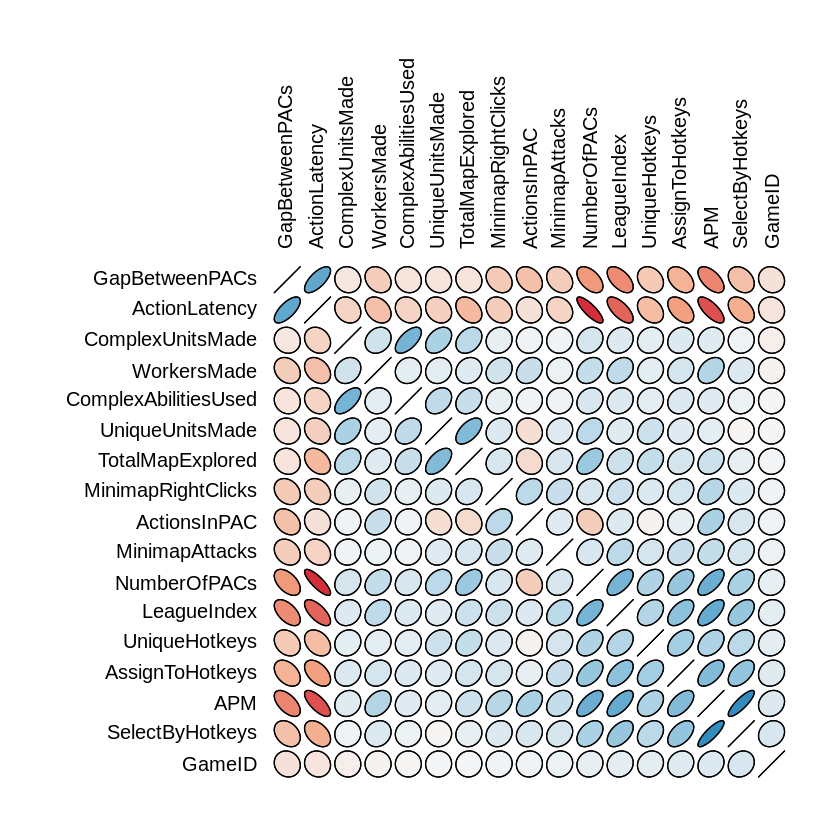

In [4]:
library(ggplot2)
library(RColorBrewer)
library(ellipse)

data <- file[,-c(3,4,5)]
cor_data = cor(data)

plot_colors <- brewer.pal(5, "RdBu")
plot_colors=colorRampPalette(plot_colors)(100)

ord <- order(cor_data[1, ])
data_ord = cor_data[ord, ord]

plotcorr(data_ord , col=plot_colors[data_ord*50+50] , mar=c(1,1,1,1)  )

In [5]:
# Running the correlation matrix bove helps to identify correlations in the data to better tell the story of what truely makes a
# great StarCraft 2 player.

In [6]:
file[file$Age == "?",]


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
3341,10001,8,?,?,?,189.7404,0.004582151,0.0006545931,4,7.273256e-05,6.182268e-04,0.006291367,23.5130,32.5665,4.4451,25,0.00221830,6,0.000000e+00,0.0000e+00
3342,10005,8,?,?,?,287.8128,0.029039722,0.0010412649,9,2.313922e-04,6.556113e-04,0.005399152,31.6416,36.1143,4.5893,34,0.00113770,6,5.784805e-05,0.0000e+00
3343,10006,8,?,?,?,294.0996,0.029639771,0.0010757085,6,3.022652e-04,2.373671e-03,0.006294229,16.6393,36.8192,4.1850,26,0.00098681,6,0.000000e+00,0.0000e+00
3344,10015,8,?,?,?,274.2552,0.018120522,0.0012642225,8,5.267594e-05,9.745048e-04,0.007111252,10.6419,24.3556,4.3870,28,0.00110620,6,0.000000e+00,0.0000e+00
3345,10016,8,?,?,?,274.3404,0.023131288,0.0007391916,8,6.220027e-04,3.551725e-03,0.005354632,19.1568,36.3098,5.2811,28,0.00073919,6,0.000000e+00,0.0000e+00
3346,10017,8,?,?,?,245.8188,0.010471414,0.0008412383,10,6.569671e-04,1.313934e-03,0.005031406,14.5518,36.7134,7.1943,33,0.00147420,11,4.005897e-05,4.8071e-05
3347,10018,8,?,?,?,211.0722,0.013049020,0.0009402817,10,3.656651e-04,9.089389e-04,0.003719336,19.6169,38.9326,7.1320,23,0.00089849,9,0.000000e+00,0.0000e+00
3348,10021,8,?,?,?,189.5778,0.007558997,0.0004872524,10,6.057733e-04,5.662663e-04,0.005820691,22.0317,36.7330,4.9050,28,0.00053993,5,0.000000e+00,0.0000e+00
3349,10022,8,?,?,?,210.5088,0.007973528,0.0008671212,7,5.481800e-04,6.378822e-04,0.006518359,15.7856,30.7156,4.8058,34,0.00081729,6,0.000000e+00,0.0000e+00


In [7]:
head(file[file$HoursPerWeek == "?",])

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1842,5255,5,18,?,?,122.2470,0.006356849,0.0004328068,3,1.352521e-05,0.0002569790,0.003043172,30.8929,62.2933,5.3822,23,0.00105500,5,0.000000e+00,0.00033813
3341,10001,8,?,?,?,189.7404,0.004582151,0.0006545931,4,7.273256e-05,0.0006182268,0.006291367,23.5130,32.5665,4.4451,25,0.00221830,6,0.000000e+00,0.00000000
3342,10005,8,?,?,?,287.8128,0.029039722,0.0010412649,9,2.313922e-04,0.0006556113,0.005399152,31.6416,36.1143,4.5893,34,0.00113770,6,5.784805e-05,0.00000000
3343,10006,8,?,?,?,294.0996,0.029639771,0.0010757085,6,3.022652e-04,0.0023736709,0.006294229,16.6393,36.8192,4.1850,26,0.00098681,6,0.000000e+00,0.00000000
3344,10015,8,?,?,?,274.2552,0.018120522,0.0012642225,8,5.267594e-05,0.0009745048,0.007111252,10.6419,24.3556,4.3870,28,0.00110620,6,0.000000e+00,0.00000000
3345,10016,8,?,?,?,274.3404,0.023131288,0.0007391916,8,6.220027e-04,0.0035517254,0.005354632,19.1568,36.3098,5.2811,28,0.00073919,6,0.000000e+00,0.00000000


In [8]:
file[file$TotalHours == "?",]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
359,1064,5,17,20,?,94.4724,0.003846005,0.0007827297,3,9.663330e-06,1.352866e-04,0.004474122,50.5455,54.9287,3.0972,31,0.00076340,7,1.062966e-04,1.1596e-04
1842,5255,5,18,?,?,122.2470,0.006356849,0.0004328068,3,1.352521e-05,2.569790e-04,0.003043172,30.8929,62.2933,5.3822,23,0.00105500,5,0.000000e+00,3.3813e-04
3341,10001,8,?,?,?,189.7404,0.004582151,0.0006545931,4,7.273256e-05,6.182268e-04,0.006291367,23.5130,32.5665,4.4451,25,0.00221830,6,0.000000e+00,0.0000e+00
3342,10005,8,?,?,?,287.8128,0.029039722,0.0010412649,9,2.313922e-04,6.556113e-04,0.005399152,31.6416,36.1143,4.5893,34,0.00113770,6,5.784805e-05,0.0000e+00
3343,10006,8,?,?,?,294.0996,0.029639771,0.0010757085,6,3.022652e-04,2.373671e-03,0.006294229,16.6393,36.8192,4.1850,26,0.00098681,6,0.000000e+00,0.0000e+00
3344,10015,8,?,?,?,274.2552,0.018120522,0.0012642225,8,5.267594e-05,9.745048e-04,0.007111252,10.6419,24.3556,4.3870,28,0.00110620,6,0.000000e+00,0.0000e+00
3345,10016,8,?,?,?,274.3404,0.023131288,0.0007391916,8,6.220027e-04,3.551725e-03,0.005354632,19.1568,36.3098,5.2811,28,0.00073919,6,0.000000e+00,0.0000e+00
3346,10017,8,?,?,?,245.8188,0.010471414,0.0008412383,10,6.569671e-04,1.313934e-03,0.005031406,14.5518,36.7134,7.1943,33,0.00147420,11,4.005897e-05,4.8071e-05
3347,10018,8,?,?,?,211.0722,0.013049020,0.0009402817,10,3.656651e-04,9.089389e-04,0.003719336,19.6169,38.9326,7.1320,23,0.00089849,9,0.000000e+00,0.0000e+00


In [9]:
file[file$Age == "?" | file$HoursPerWeek == "?" | file$TotalHours == "?" ,]

# After examining the structure of the dataset (str()) and filtering for "?" in the only 3 columns containing factor values as
# it was observed when using the str() function that "?" was used for missing values, that the only missing values in this
# dataset are in the Age, HoursPerWeek, and TotalHours columns and appear to be missing in the for same users (gameID). 
# Although I could it is very tempting to just remove this rows from the dataset and call it clean, I do notice something very
# important with these rows.  All but 2 of these rows are from players with a leagueIndex of 8.  This means that all of these players
# are professional Starcraft 2 players and it is very important to keep these rows in our data as the stats from them would 
# correllate with the highest succuss rate.

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
359,1064,5,17,20,?,94.4724,0.003846005,0.0007827297,3,9.663330e-06,1.352866e-04,0.004474122,50.5455,54.9287,3.0972,31,0.00076340,7,1.062966e-04,1.1596e-04
1842,5255,5,18,?,?,122.2470,0.006356849,0.0004328068,3,1.352521e-05,2.569790e-04,0.003043172,30.8929,62.2933,5.3822,23,0.00105500,5,0.000000e+00,3.3813e-04
3341,10001,8,?,?,?,189.7404,0.004582151,0.0006545931,4,7.273256e-05,6.182268e-04,0.006291367,23.5130,32.5665,4.4451,25,0.00221830,6,0.000000e+00,0.0000e+00
3342,10005,8,?,?,?,287.8128,0.029039722,0.0010412649,9,2.313922e-04,6.556113e-04,0.005399152,31.6416,36.1143,4.5893,34,0.00113770,6,5.784805e-05,0.0000e+00
3343,10006,8,?,?,?,294.0996,0.029639771,0.0010757085,6,3.022652e-04,2.373671e-03,0.006294229,16.6393,36.8192,4.1850,26,0.00098681,6,0.000000e+00,0.0000e+00
3344,10015,8,?,?,?,274.2552,0.018120522,0.0012642225,8,5.267594e-05,9.745048e-04,0.007111252,10.6419,24.3556,4.3870,28,0.00110620,6,0.000000e+00,0.0000e+00
3345,10016,8,?,?,?,274.3404,0.023131288,0.0007391916,8,6.220027e-04,3.551725e-03,0.005354632,19.1568,36.3098,5.2811,28,0.00073919,6,0.000000e+00,0.0000e+00
3346,10017,8,?,?,?,245.8188,0.010471414,0.0008412383,10,6.569671e-04,1.313934e-03,0.005031406,14.5518,36.7134,7.1943,33,0.00147420,11,4.005897e-05,4.8071e-05
3347,10018,8,?,?,?,211.0722,0.013049020,0.0009402817,10,3.656651e-04,9.089389e-04,0.003719336,19.6169,38.9326,7.1320,23,0.00089849,9,0.000000e+00,0.0000e+00


In [10]:
file[file$LeagueIndex == 8,]

# I filtered again for LeageIndex of 8 to confirm that all of the pro players were missing these values in the Age, HoursPerWeek,
# and TotalHours columns meaning these rows are too important to get rid of.  To clean this up I only remove two rows missing
# data that are not pro players and fill the age column of the pros with 23, which is the average age of professional Starcraft2
# player, according to casino.org.  Since these are professional players I fill the HoursperWeek columb with 40.  Since there
# is no real way to make assumotions on the total hours played, professional players will just be omitteted from any plots 
#utilizing TotalHours.

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
3341,10001,8,?,?,?,189.7404,0.004582151,0.0006545931,4,7.273256e-05,6.182268e-04,0.006291367,23.5130,32.5665,4.4451,25,0.00221830,6,0.000000e+00,0.0000e+00
3342,10005,8,?,?,?,287.8128,0.029039722,0.0010412649,9,2.313922e-04,6.556113e-04,0.005399152,31.6416,36.1143,4.5893,34,0.00113770,6,5.784805e-05,0.0000e+00
3343,10006,8,?,?,?,294.0996,0.029639771,0.0010757085,6,3.022652e-04,2.373671e-03,0.006294229,16.6393,36.8192,4.1850,26,0.00098681,6,0.000000e+00,0.0000e+00
3344,10015,8,?,?,?,274.2552,0.018120522,0.0012642225,8,5.267594e-05,9.745048e-04,0.007111252,10.6419,24.3556,4.3870,28,0.00110620,6,0.000000e+00,0.0000e+00
3345,10016,8,?,?,?,274.3404,0.023131288,0.0007391916,8,6.220027e-04,3.551725e-03,0.005354632,19.1568,36.3098,5.2811,28,0.00073919,6,0.000000e+00,0.0000e+00
3346,10017,8,?,?,?,245.8188,0.010471414,0.0008412383,10,6.569671e-04,1.313934e-03,0.005031406,14.5518,36.7134,7.1943,33,0.00147420,11,4.005897e-05,4.8071e-05
3347,10018,8,?,?,?,211.0722,0.013049020,0.0009402817,10,3.656651e-04,9.089389e-04,0.003719336,19.6169,38.9326,7.1320,23,0.00089849,9,0.000000e+00,0.0000e+00
3348,10021,8,?,?,?,189.5778,0.007558997,0.0004872524,10,6.057733e-04,5.662663e-04,0.005820691,22.0317,36.7330,4.9050,28,0.00053993,5,0.000000e+00,0.0000e+00
3349,10022,8,?,?,?,210.5088,0.007973528,0.0008671212,7,5.481800e-04,6.378822e-04,0.006518359,15.7856,30.7156,4.8058,34,0.00081729,6,0.000000e+00,0.0000e+00


## Step 5: Filter Results

Perform you data carpentry that helps in your story telling here.

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [11]:
sc2 <- file[-c(359,1842),]

sc2$Age <- replace(sc2$Age, sc2$Age == "?", 23)
sc2$HoursPerWeek <- replace(sc2$HoursPerWeek, sc2$HoursPerWeek == "?", 40)

sc2[sc2$Age == "?" | sc2$HoursPerWeek == "?" | sc2$TotalHours == "?",]




,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
3341,10001,8,23,40,?,189.7404,0.004582151,0.0006545931,4,7.273256e-05,6.182268e-04,0.006291367,23.5130,32.5665,4.4451,25,0.00221830,6,0.000000e+00,0.0000e+00
3342,10005,8,23,40,?,287.8128,0.029039722,0.0010412649,9,2.313922e-04,6.556113e-04,0.005399152,31.6416,36.1143,4.5893,34,0.00113770,6,5.784805e-05,0.0000e+00
3343,10006,8,23,40,?,294.0996,0.029639771,0.0010757085,6,3.022652e-04,2.373671e-03,0.006294229,16.6393,36.8192,4.1850,26,0.00098681,6,0.000000e+00,0.0000e+00
3344,10015,8,23,40,?,274.2552,0.018120522,0.0012642225,8,5.267594e-05,9.745048e-04,0.007111252,10.6419,24.3556,4.3870,28,0.00110620,6,0.000000e+00,0.0000e+00
3345,10016,8,23,40,?,274.3404,0.023131288,0.0007391916,8,6.220027e-04,3.551725e-03,0.005354632,19.1568,36.3098,5.2811,28,0.00073919,6,0.000000e+00,0.0000e+00
3346,10017,8,23,40,?,245.8188,0.010471414,0.0008412383,10,6.569671e-04,1.313934e-03,0.005031406,14.5518,36.7134,7.1943,33,0.00147420,11,4.005897e-05,4.8071e-05
3347,10018,8,23,40,?,211.0722,0.013049020,0.0009402817,10,3.656651e-04,9.089389e-04,0.003719336,19.6169,38.9326,7.1320,23,0.00089849,9,0.000000e+00,0.0000e+00
3348,10021,8,23,40,?,189.5778,0.007558997,0.0004872524,10,6.057733e-04,5.662663e-04,0.005820691,22.0317,36.7330,4.9050,28,0.00053993,5,0.000000e+00,0.0000e+00
3349,10022,8,23,40,?,210.5088,0.007973528,0.0008671212,7,5.481800e-04,6.378822e-04,0.006518359,15.7856,30.7156,4.8058,34,0.00081729,6,0.000000e+00,0.0000e+00


In [12]:
sc2$Age <- replace(sc2$Age, sc2$Age == "?", 23)
sc2$LeagueIndex <- replace(sc2$LeagueIndex, sc2$LeagueIndex == 1, "1-Bronze")
sc2$LeagueIndex <- replace(sc2$LeagueIndex, sc2$LeagueIndex == 2, "2-Silver")
sc2$LeagueIndex <- replace(sc2$LeagueIndex, sc2$LeagueIndex == 3, "3-Gold")
sc2$LeagueIndex <- replace(sc2$LeagueIndex, sc2$LeagueIndex == 4, "4-Platinum")
sc2$LeagueIndex <- replace(sc2$LeagueIndex, sc2$LeagueIndex == 5, "5-Diamond")
sc2$LeagueIndex <- replace(sc2$LeagueIndex, sc2$LeagueIndex == 6, "6-Master")
sc2$LeagueIndex <- replace(sc2$LeagueIndex, sc2$LeagueIndex == 7, "7-GrandMaster")
sc2$LeagueIndex <- replace(sc2$LeagueIndex, sc2$LeagueIndex == 8, "8-Pro")

head(sc2$LeagueIndex)

[1] "5-Diamond"  "5-Diamond"  "4-Platinum" "3-Gold"     "3-Gold"    
[6] "2-Silver"

In [13]:
# I now create a subset called, RisingStars, which excludes the pro players, in case I decide to use the TotalHours column for a
# vissualization.

rising_stars <- sc2[sc2$LeagueIndex < 8,]

tail(rising_stars)
rising_stars[rising_stars$LeagueIndex == 8,]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
,<int>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
3335,9260,4-Platinum,23,36,1500,96.6198,0.0014712604,0.0003713861,3,0.000000e+00,0.0002856816,0.002613987,47.2967,82.3825,6.0383,22,0.00051423,5,0,0.0000e+00
3336,9261,4-Platinum,20,8,400,158.1390,0.0138294541,0.0005044707,7,2.174442e-04,0.0003131197,0.003583481,36.3990,66.2718,4.5097,30,0.00103500,7,0,2.8703e-04
3337,9264,5-Diamond,16,56,1500,186.1320,0.0069505981,0.0003599911,6,8.307488e-05,0.0001661498,0.005413713,22.8615,34.7417,4.9309,38,0.00134300,7,0,3.8768e-04
3338,9265,4-Platinum,21,8,100,121.6992,0.0029559886,0.0002408583,8,5.474053e-05,0.0002080140,0.003689512,35.5833,57.9585,5.4154,23,0.00201450,7,0,0.0000e+00
3339,9270,3-Gold,20,28,400,134.2848,0.0054235001,0.0001816483,5,0.000000e+00,0.0004800706,0.003204796,18.2927,62.4615,6.0202,18,0.00093419,5,0,0.0000e+00
3340,9271,4-Platinum,22,6,400,88.8246,0.0008442912,0.0001077818,2,0.000000e+00,0.0003413092,0.003098728,45.1512,63.4435,5.1913,20,0.00047604,8,0,5.3891e-05


GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
<int>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>


In [14]:
# It turns out it might be helpful to plot all variables on the same graph.
sc2_long_league <- sc2 %>% pivot_longer(6:20, names_to = "Variable", values_to = "Value")
head(sc2_long_league)


GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,Variable,Value
<int>,<chr>,<fct>,<fct>,<fct>,<chr>,<dbl>
52,5-Diamond,27,10,3000,APM,1.437180e+02
52,5-Diamond,27,10,3000,SelectByHotkeys,3.515159e-03
52,5-Diamond,27,10,3000,AssignToHotkeys,2.196974e-04
52,5-Diamond,27,10,3000,UniqueHotkeys,7.000000e+00
52,5-Diamond,27,10,3000,MinimapAttacks,1.098487e-04
52,5-Diamond,27,10,3000,MinimapRightClicks,3.923169e-04


In [15]:
sc2_long_APM <- sc2 %>% pivot_longer(c("SelectByHotkeys", "NumberOfPACs", "ActionLatency"), names_to = "Variable", values_to = "Value")
head(sc2_long_APM)

GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,GapBetweenPACs,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,Variable,Value
<int>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>
52,5-Diamond,27,10,3000,143.7180,0.0002196974,7,0.0001098487,0.0003923169,32.6677,4.7508,28,0.0013966,6,0,0.00000000,SelectByHotkeys,0.003515159
52,5-Diamond,27,10,3000,143.7180,0.0002196974,7,0.0001098487,0.0003923169,32.6677,4.7508,28,0.0013966,6,0,0.00000000,NumberOfPACs,0.004849036
52,5-Diamond,27,10,3000,143.7180,0.0002196974,7,0.0001098487,0.0003923169,32.6677,4.7508,28,0.0013966,6,0,0.00000000,ActionLatency,40.867300000
55,5-Diamond,23,10,5000,129.2322,0.0002594617,4,0.0002940566,0.0004324362,32.9194,4.8434,22,0.0011935,5,0,0.00020757,SelectByHotkeys,0.003303812
55,5-Diamond,23,10,5000,129.2322,0.0002594617,4,0.0002940566,0.0004324362,32.9194,4.8434,22,0.0011935,5,0,0.00020757,NumberOfPACs,0.004307064
55,5-Diamond,23,10,5000,129.2322,0.0002594617,4,0.0002940566,0.0004324362,32.9194,4.8434,22,0.0011935,5,0,0.00020757,ActionLatency,42.345400000


# dont use this cell


## Step 6: Visuals 

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

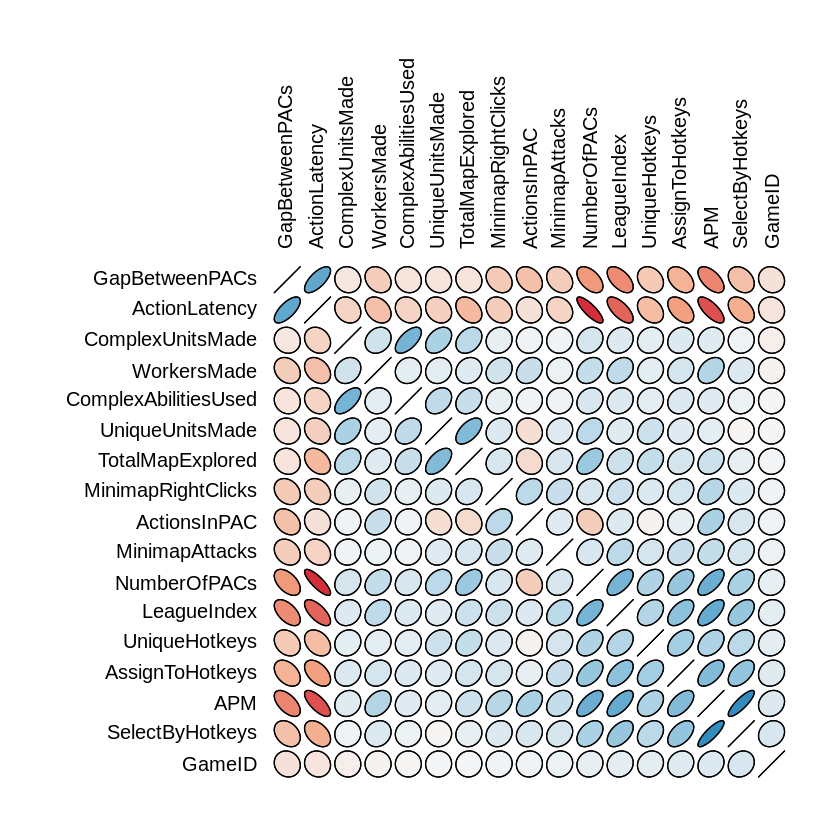

In [16]:
data <- file[,-c(3,4,5)]
cor_data = cor(data)

plot_colors <- brewer.pal(5, "RdBu")
plot_colors=colorRampPalette(plot_colors)(100)

ord <- order(cor_data[1, ])
data_ord = cor_data[ord, ord]

plotcorr(data_ord , col=plot_colors[data_ord*50+50] , mar=c(1,1,1,1)  )





Warning message:
“Using size for a discrete variable is not advised.”

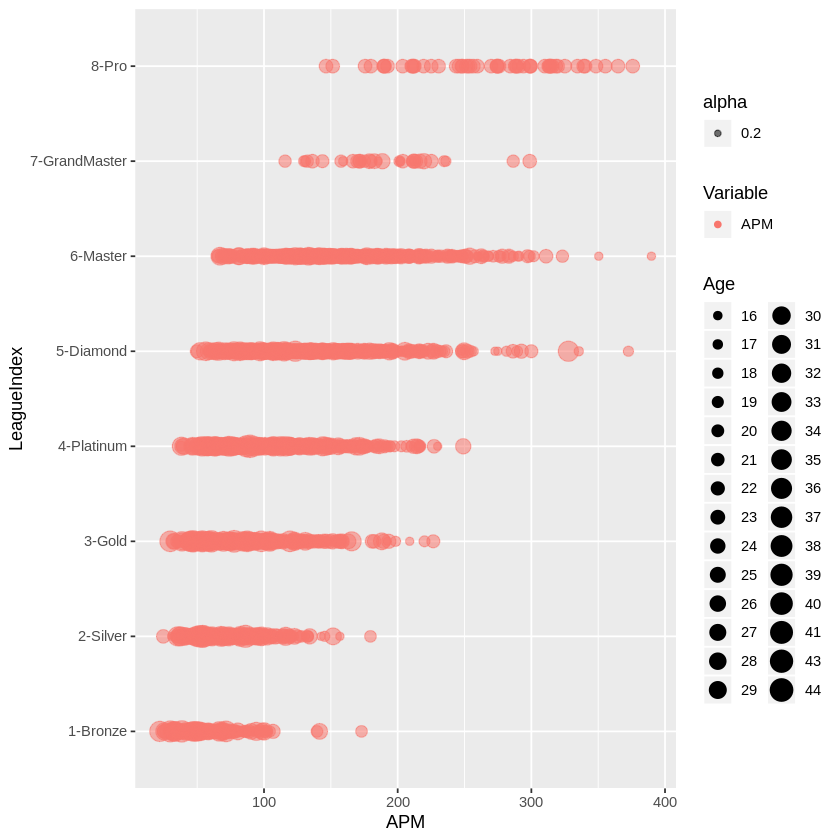

In [17]:
sc2_p1 <- subset(sc2_long_league, Variable == "APM")
plot1 <- ggplot(sc2_p1, aes(x=Value, y=LeagueIndex, color=Variable, size = Age)) + 
      geom_point(aes(alpha = 0.2)) + xlab("APM")

plot1

Warning message in Variable == c("ActionLatency", "GapBetweenPACs", "TotalMapExplored", :
“longer object length is not a multiple of shorter object length”Warning message:
“Using size for a discrete variable is not advised.”

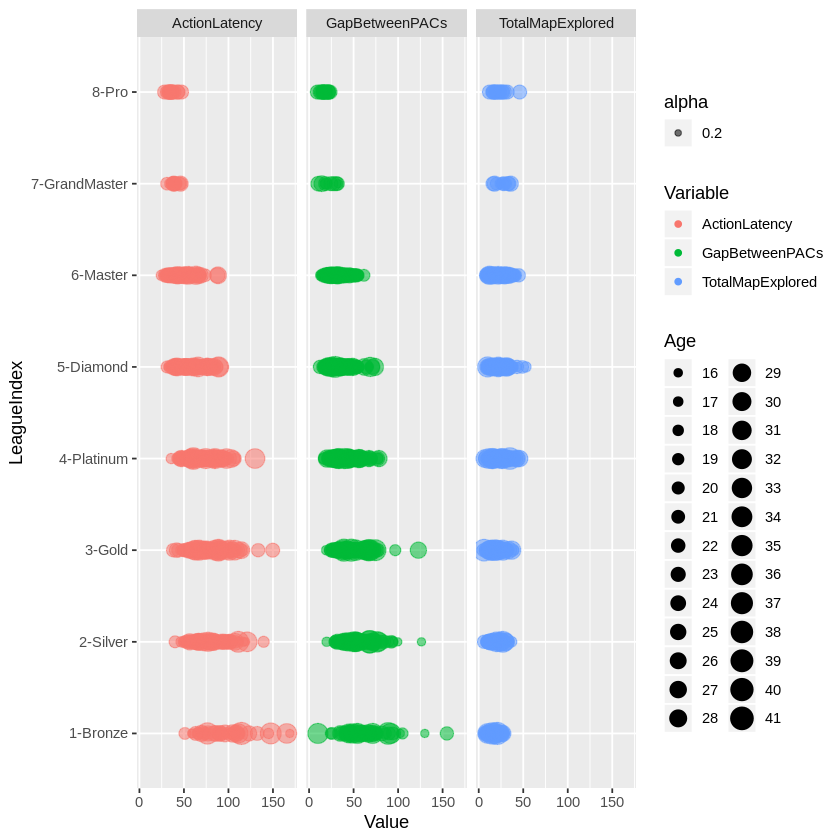

In [18]:
# For some reason my plot only works if "AssignToHotKeys" is included although it is not showing up as facetted on my plot.

sc2_p2 <- filter(sc2_long_league, Variable == c("ActionLatency", "GapBetweenPACs", "TotalMapExplored","AssignToHotKeys"))
plot2 <- ggplot(sc2_p2, aes(x=Value, y=LeagueIndex, color=Variable, size = Age)) + 
      geom_point(aes(alpha = 0.2)) + facet_wrap(~Variable)

plot2

Warning message in Variable == c("ActionsInPAC", "UniqueUnitsMade"):
“longer object length is not a multiple of shorter object length”Warning message:
“Using size for a discrete variable is not advised.”

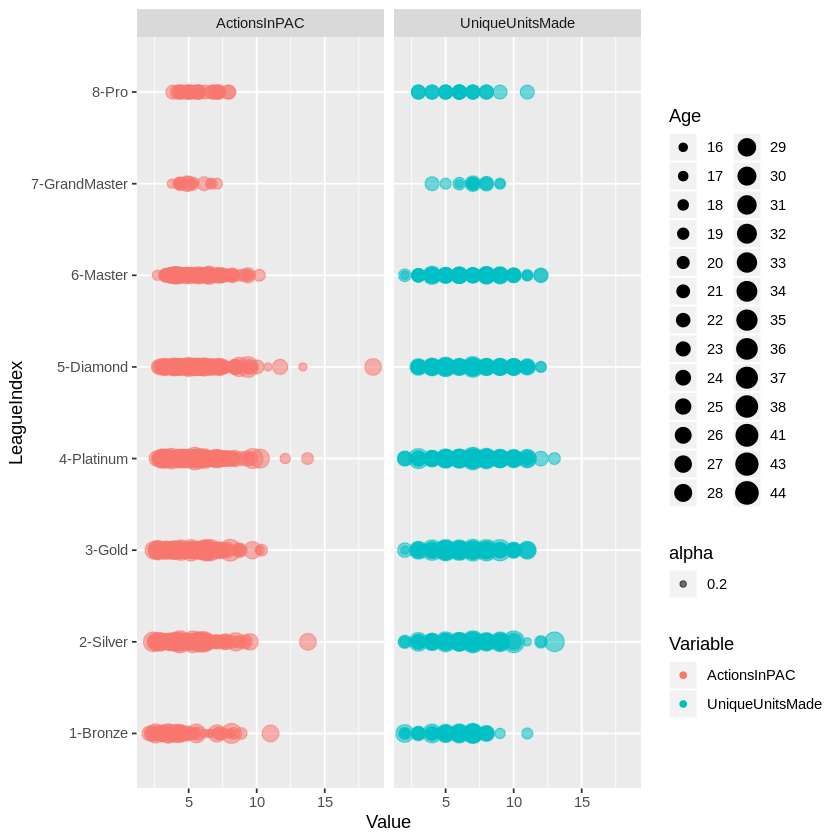

In [19]:


sc2_p3 <- filter(sc2_long_league, Variable == c("ActionsInPAC", "UniqueUnitsMade"))
plot3 <- ggplot(sc2_p3, aes(x=Value, y=LeagueIndex, color=Variable, size = Age)) + 
      geom_point(aes(alpha = 0.2)) + facet_wrap(~Variable)

plot3

Warning message in Variable == c("AssignToHotKeys", "MinimapAttacks", "MinimapRightClicks", :
“longer object length is not a multiple of shorter object length”Warning message:
“Using size for a discrete variable is not advised.”

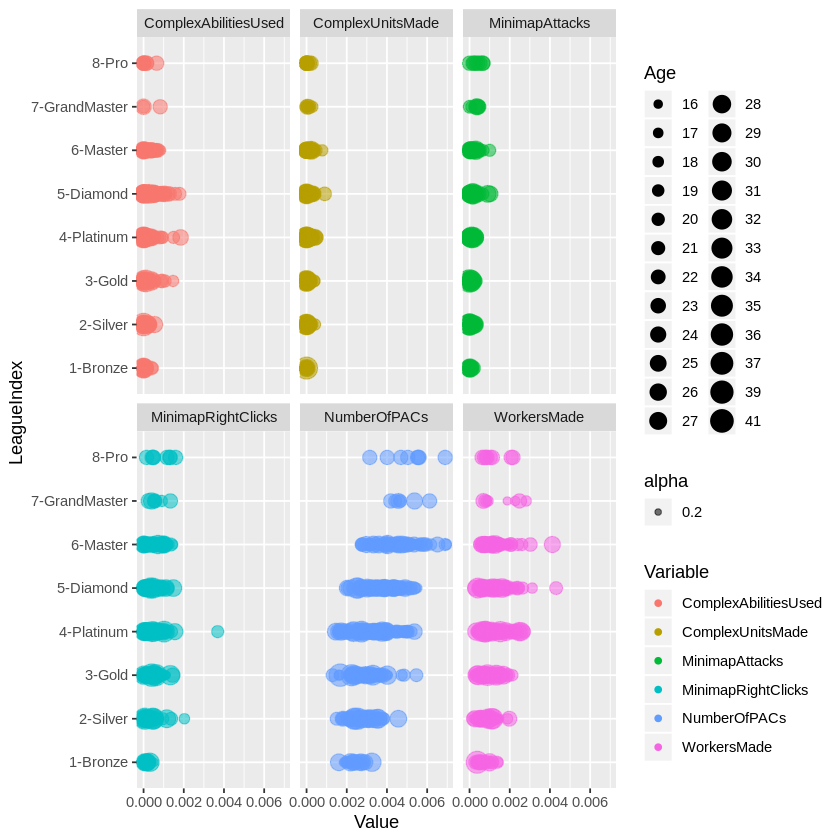

In [20]:
# For some reason my plot only works if "AssignToHotKeys" is included although it is not showing up as facetted on my plot.

sc2_p4 <- subset(sc2_long_league, Variable == c("AssignToHotKeys", "MinimapAttacks", "MinimapRightClicks", "NumberOfPACs", "WorkersMade", "ComplexAbilitiesUsed", "ComplexUnitsMade"))
plot4 <- ggplot(sc2_p4, aes(x=Value, y=LeagueIndex, color=Variable, size = Age)) + 
      geom_point(aes(alpha = 0.2)) + facet_wrap(~Variable)

plot4

Warning message:
“Using size for a discrete variable is not advised.”

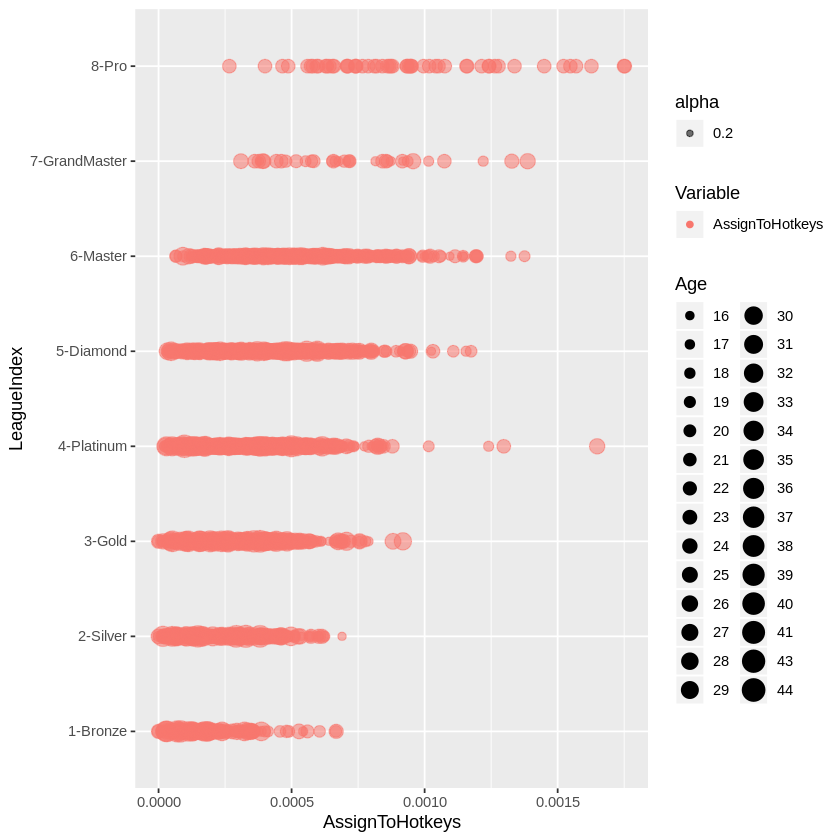

In [21]:
sc2_p5 <- subset(sc2_long_league, Variable == "AssignToHotkeys")
plot5 <- ggplot(sc2_p5, aes(x=Value, y=LeagueIndex, color=Variable, size = Age)) + 
      geom_point(aes(alpha = 0.2)) + xlab("AssignToHotkeys")

plot5

Warning message:
“Using size for a discrete variable is not advised.”

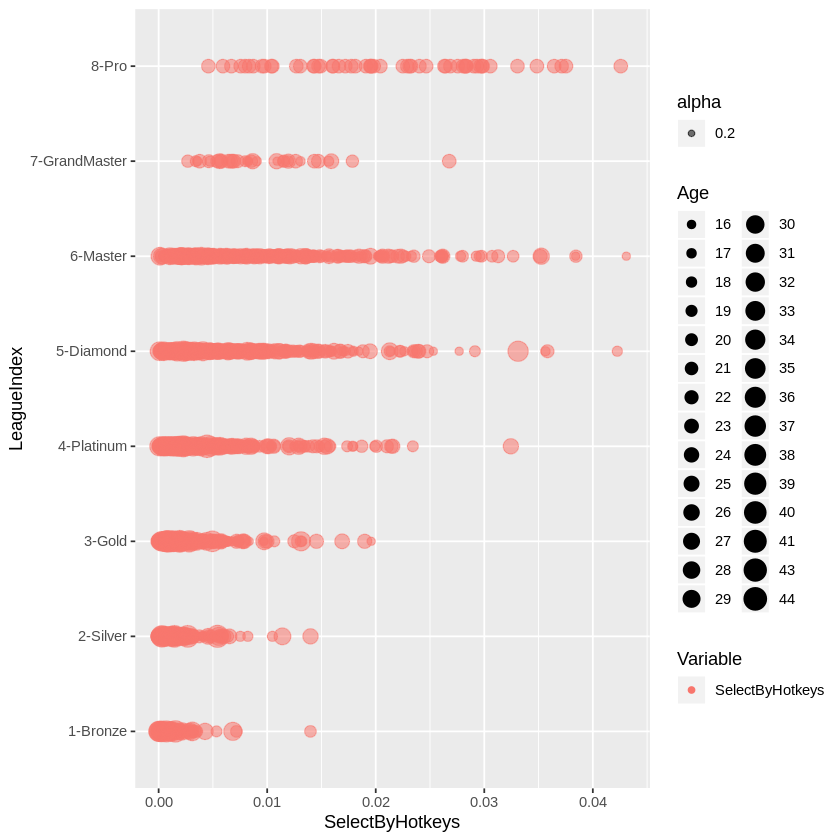

In [22]:
sc2_p6 <- subset(sc2_long_league, Variable == "SelectByHotkeys")
plot6 <- ggplot(sc2_p6, aes(x=Value, y=LeagueIndex, color=Variable, size = Age)) + 
      geom_point(aes(alpha = 0.2)) + xlab("SelectByHotkeys")

plot6

Warning message:
“Using size for a discrete variable is not advised.”

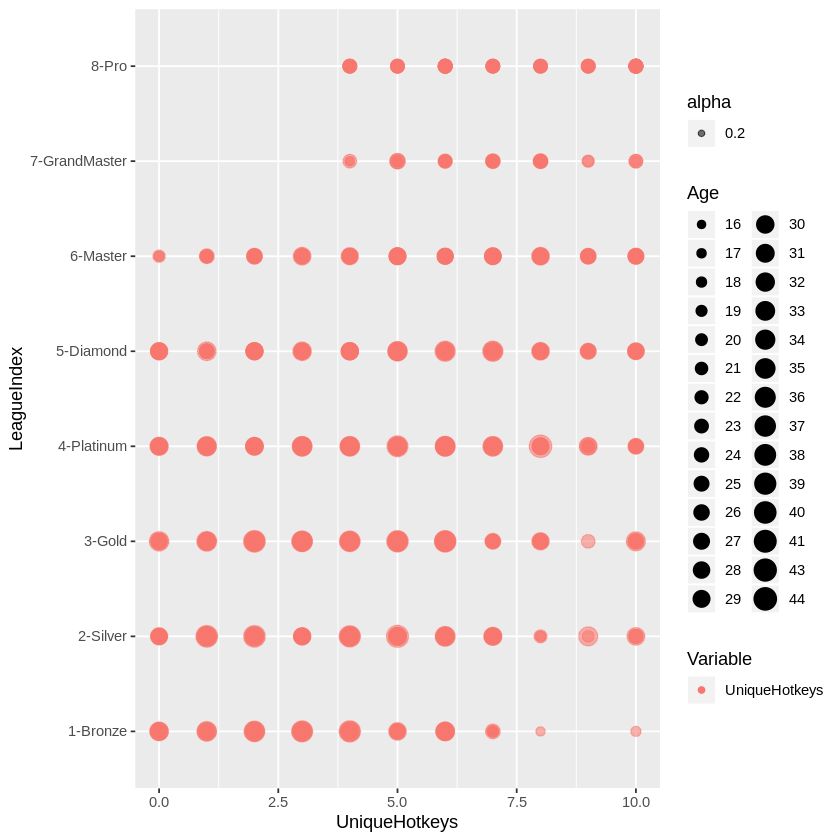

In [23]:
sc2_p7 <- subset(sc2_long_league, Variable == "UniqueHotkeys")
plot7 <- ggplot(sc2_p7, aes(x=Value, y=LeagueIndex, color=Variable, size = Age)) + 
      geom_point(aes(alpha = 0.2)) + xlab("UniqueHotkeys")

plot7

Warning message:
“Using size for a discrete variable is not advised.”

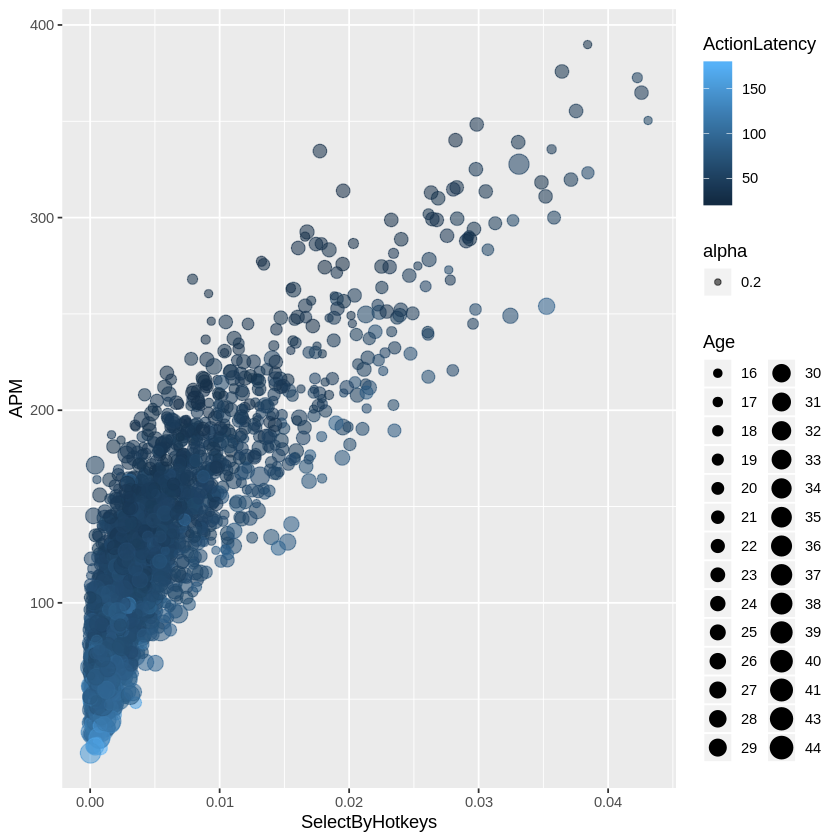

In [24]:
plot8 <- ggplot(sc2, aes(x=SelectByHotkeys, y=APM, color=ActionLatency, size = Age)) + 
      geom_point(aes(alpha = 0.2))

plot8

Warning message:
“Using size for a discrete variable is not advised.”

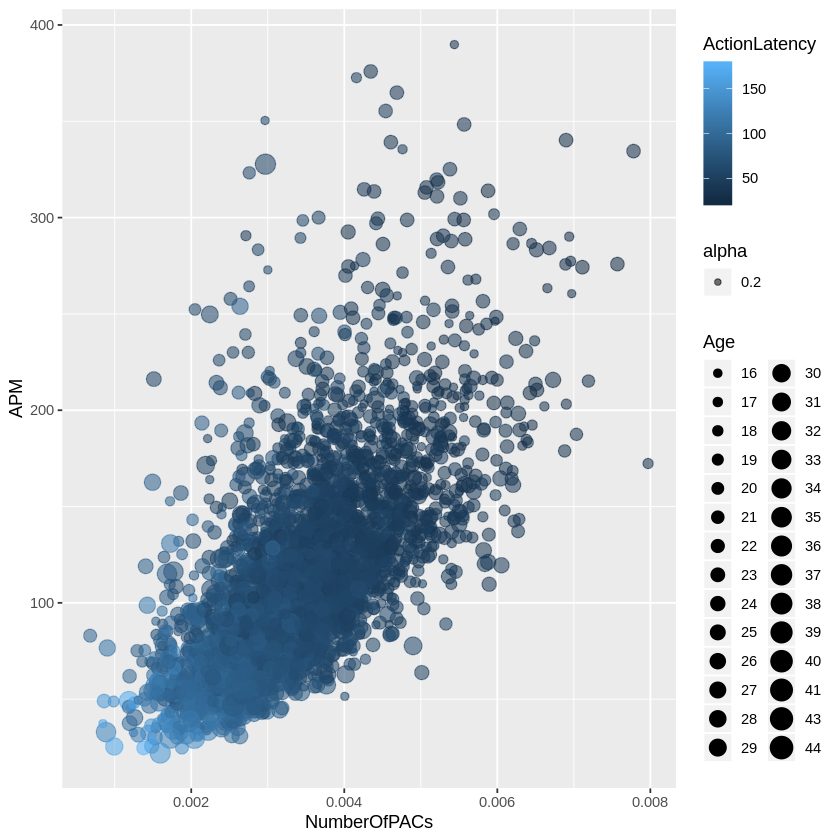

In [25]:
plot9 <- ggplot(sc2, aes(x=NumberOfPACs, y=APM, color=ActionLatency, size = Age)) + 
      geom_point(aes(alpha = 0.2))

plot9

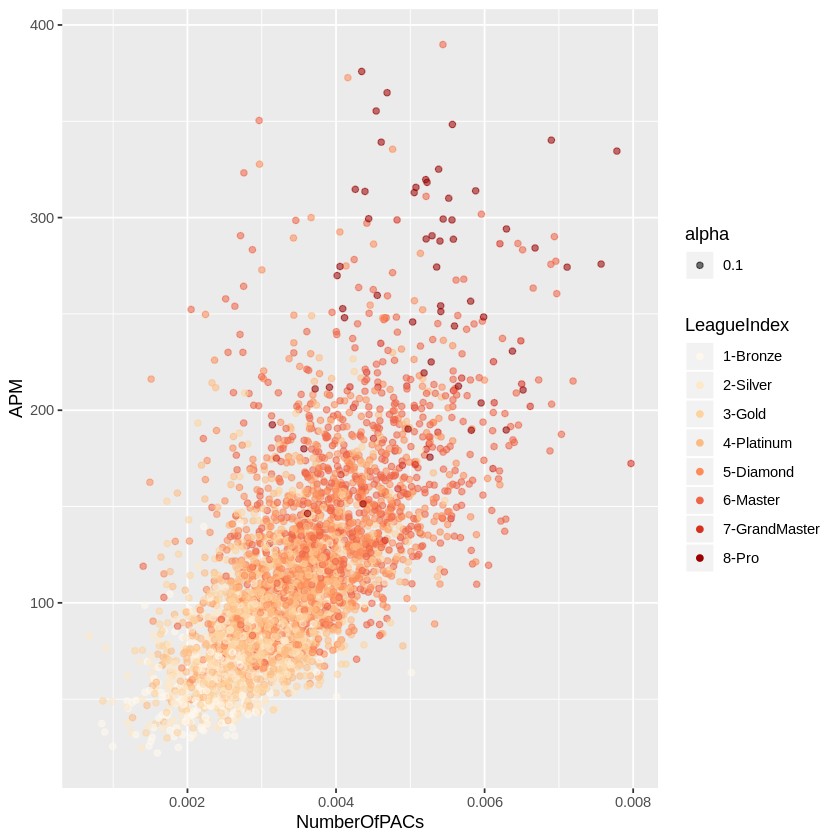

In [37]:
plot10 <- ggplot(sc2, aes(x=NumberOfPACs, y=APM, color=LeagueIndex)) + 
      geom_point(aes(alpha = 0.1)) + scale_colour_brewer(palette='OrRd')
plot10

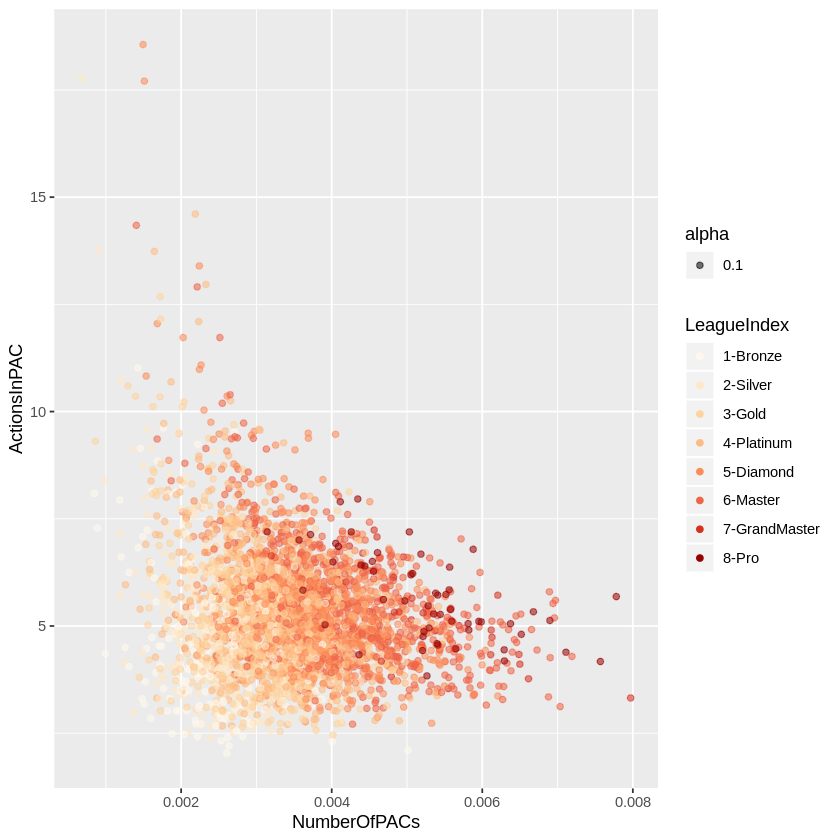

In [32]:
plot11 <- ggplot(sc2, aes(x=NumberOfPACs, y=ActionsInPAC, color=LeagueIndex)) + 
      geom_point(aes(alpha = 0.1)) + scale_colour_brewer(palette='OrRd')
plot11

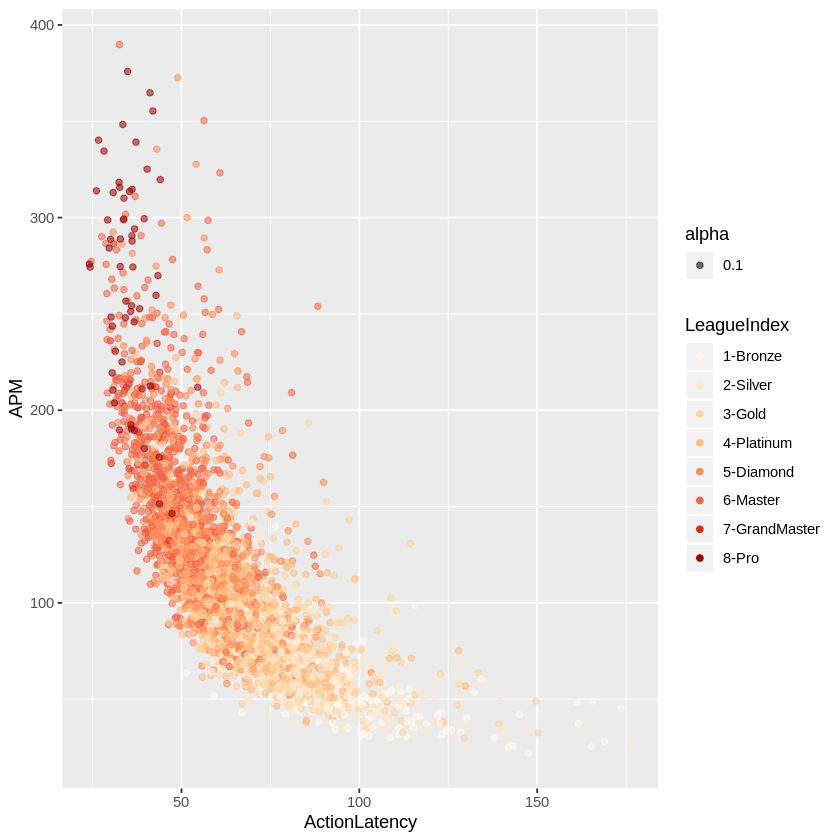

In [35]:
plot12 <- ggplot(sc2, aes(x=ActionLatency, y=APM, color=LeagueIndex)) + 
      geom_point(aes(alpha = 0.1)) + scale_colour_brewer(palette='OrRd')
plot12

## Conclusion: Tell the Story
In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel. 

Feel free to post more examples for people to look at and give feedback about. Your classmates will be vital providers of feedback in this process. Utilize them.

# Save your notebook, then `File > Close and Halt`